In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr

#path
PATH_PP = '/scratch/ab10313/pleiades/05_argentina/preprcossed_data/'

# load data

lat = xr.open_dataarray(PATH_PP+'lat.nc',engine="h5netcdf")
lon = xr.open_dataarray(PATH_PP+'lon.nc',engine="h5netcdf")

B = xr.open_dataarray(PATH_PP+'B.nc',engine="h5netcdf")
W = xr.open_dataarray(PATH_PP+'W.nc',engine="h5netcdf")


# cospectrum of w and b at the surface

In [5]:
dx = B.dxF.mean()

In [6]:
B_drop = B.drop(['CS', 'SN', 'Depth', 'dxF', 'dyF', 'rA', 'XC', 'YC']).fillna(0)
W_drop = W.drop(['CS', 'SN', 'Depth', 'dxF', 'dyF', 'rA', 'XC', 'YC']).fillna(0)

In [7]:
#  spectra
import xrft
B_spectra = xrft.isotropic_power_spectrum(B_drop,dim=['i','j'], 
                                           detrend='linear', window=True).compute().mean('time')

/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:1025: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)


In [8]:
W_spectra = xrft.isotropic_power_spectrum(W_drop,dim=['i','j'], 
                                           detrend='linear', window=True).compute().mean('time')
del W_drop

/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:1025: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)


In [9]:
WB_cross_spectra = (W_spectra*np.conjugate(B_spectra)).real

In [12]:
WB_cross_spectra_r = (B_spectra*np.conjugate(W_spectra)).real

In [10]:
k_r = B_spectra.freq_r/dx/1e-3

Text(0.5, 1.0, 'isotropic wb cross-spectrum')

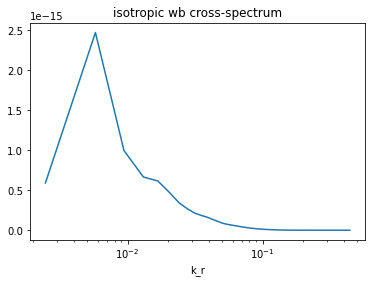

In [11]:
import matplotlib.colors as colors

plt.plot(k_r,  WB_cross_spectra)
plt.xscale("log")
plt.xlabel('k_r')
plt.title('isotropic wb cross-spectrum')